In [42]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Importing the Loan data from csv
loan = pd.read_csv(r'C:\Users\gupta\Downloads\UpGrad_AI_ML\Assignment_2\Assignment_new\loan.csv', encoding = 'UTF-8')

C:\Users\gupta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


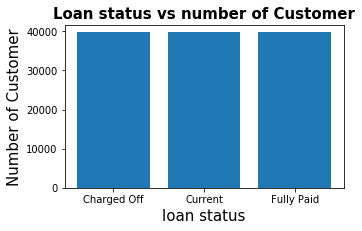

In [43]:
plt.figure(figsize=(5,3))
plt.title('Loan status vs number of Customer', fontsize=15, fontweight='bold')

plt.bar(loan['loan_status'],loan['id'].count())

plt.xlabel('loan status', fontsize=15)
plt.ylabel('Number of Customer', fontsize=15)

plt.show()

In [2]:
#Cleaning the imported data in order to prepare it for the analysis

#Finding out remaining columns with missing values
Drop_col = pd.DataFrame(round(100*(loan.isnull().sum()/len(loan.index)), 2))
Drop_col = Drop_col.reset_index()
Drop_col.rename(columns = {Drop_col.columns[1]:"Percent"}, inplace = True)

#Separating columns with at least one missing value
Drop_col = Drop_col.loc[(Drop_col['Percent'] > 0)]
Drop_col.sort_values(by = 'Percent', ascending = False, inplace = True)
Drop_col

,index,Percent
76,bc_open_to_buy,100.00
74,acc_open_past_24mths,100.00
77,bc_util,100.00
80,mo_sin_old_il_acct,100.00
81,mo_sin_old_rev_tl_op,100.00
82,mo_sin_rcnt_rev_tl_op,100.00
83,mo_sin_rcnt_tl,100.00
84,mort_acc,100.00
85,mths_since_recent_bc,100.00
86,mths_since_recent_bc_dlq,100.00


In [3]:
#Finding out columns with more than 90% missing values and dropping them
rem_col = Drop_col.loc[(Drop_col['Percent'] > 90)]
col_name = list(rem_col['index'])
loan.drop(col_name, axis = 1, inplace = True)

#Dropping 'mths_since_last_delinq' column as it has around 65% missing values and does not provide any benifit for analysis
loan.drop(columns = 'mths_since_last_delinq', inplace = True)

#Dropping columns with only 0 as all values and 'url' as duplicate
#Dropping columns with not usefull values
cols = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'pymnt_plan', 'url', 'initial_list_status', 'application_type']
loan.drop(cols, axis = 1, inplace = True)

#Dropping the rows where 'emp-lenght' is null, as we cannot assume the year of experience and we will be loosing only 3% of the rows
loan = loan.loc[~loan['emp_length'].isnull()]

#Removing the rows where 'last_pymnt_d', 'revol_util' or'last_credit_pulled_d' value is missing as missing value is only .10th% so we won't be losing much data
loan = loan.loc[~(loan['last_pymnt_d'].isnull() | loan['revol_util'].isnull() | loan['last_credit_pull_d'].isnull())]

#Filling NaN in emp_title column as Not Available since the employer is not a huege driver in the loan process
loan['emp_title'].fillna('Not Available', inplace = True)

#Filling null values in 'pub_rec_bankruptcies' column with 0 as its not a huge driving factor for the analysis
loan['pub_rec_bankruptcies'].fillna(0, inplace = True)

#Replacing null values in column desc with 'Not available'
loan['desc'].fillna('Not Available', inplace = True)

#Replacinf the missing 'title' column values to 'Not Specified'
loan['title'].fillna('Not Specified', inplace = True)

In [4]:
#Finding out remaining columns with missing values
Drop_col = pd.DataFrame(round(100*(loan.isnull().sum()/len(loan.index)), 2))
Drop_col = Drop_col.reset_index()
Drop_col.rename(columns = {Drop_col.columns[1]:"Percent"}, inplace = True)

#Separating columns with at least one missing value
Drop_col = Drop_col.loc[(Drop_col['Percent'] > 0)]
Drop_col.sort_values(by = 'Percent', ascending = False, inplace = True)
Drop_col

,index,Percent


In [5]:
#Standardizing 'emp_lenght' so that it could be used in the calculations
loan['emp_length_in_years'] = loan['emp_length'].str.rstrip(' years')
loan.drop('emp_length', axis = 1, inplace = True)
loan.emp_length_in_years = loan.emp_length_in_years.replace({"> 1":"1.10", "< 1":"0.9", "10+":"11"})
loan['emp_length_in_years'] = loan['emp_length_in_years'].str.strip()
loan['emp_length_in_years'] = pd.to_numeric(loan['emp_length_in_years'])

In [6]:
#Changing date columns in datetime format
loan['issue_d'] = loan['issue_d'].apply(lambda x:datetime.datetime.strptime(x, '%b-%y'))
loan['last_pymnt_d'] = loan['last_pymnt_d'].apply(lambda x:datetime.datetime.strptime(x, '%b-%y'))
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].apply(lambda x:datetime.datetime.strptime(x, '%b-%y'))

In [7]:
#Changing 'int_rate' column to numeric
loan['int_rate_in%'] = loan['int_rate'].str.rstrip('%')
loan['int_rate_in%'] = pd.to_numeric(loan['int_rate_in%'])
loan.drop('int_rate', axis = 1, inplace = True)

In [8]:
#Changing 'term' column to numeric
loan['term_in_months'] = loan['term'].str.rstrip(' months')
loan['term_in_months'] = pd.to_numeric(loan['term_in_months'])
loan.drop('term', axis = 1, inplace = True)

In [9]:
#Changing 'revol_util' coulum to numeric
loan['revol_util_in%'] = loan['revol_util'].str.rstrip('%')
loan['revol_util_in%'] = pd.to_numeric(loan['revol_util_in%'])
loan.drop('revol_util', axis = 1, inplace = True)

In [10]:
#Removing all columns which are not useful for EDA
drop_col = ['emp_title', 'home_ownership', 'emp_length_in_years', 'desc', 'title', 'zip_code', 'dti']
loan.drop(drop_col, axis = 1, inplace = True)

#Removing all rows with loan status as current, since it does not play much role in analysis
loan = loan.loc[~(loan['loan_status'] == 'Current')]

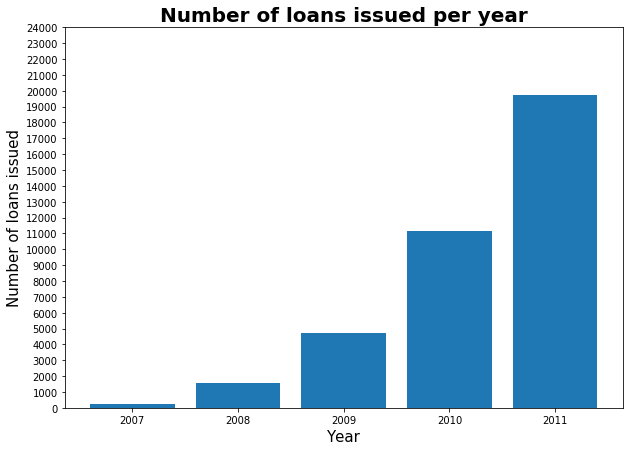

In [11]:
#Number of loans issued per year
loan_trend = pd.DataFrame(loan.groupby(loan.issue_d.dt.year)['id'].count())
loan_trend = loan_trend.reset_index()
loan_trend.rename(columns = {'id':'number_of_loans'}, inplace = True)

#Building graph showing number of loans issued per year
#Setting the size of the graph
plt.figure(figsize=(10,7))

#Setting variable for y axis of the graph
y_tick = range(0,25000,1000)

#Plotting the bar graph with title
plt.bar(loan_trend['issue_d'], loan_trend['number_of_loans'])
plt.title('Number of loans issued per year', fontsize=20, fontweight='bold')

#Setting the parameters for x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of loans issued', fontsize=15)
plt.yticks(y_tick, fontsize=10)
plt.xticks(loan_trend['issue_d'], fontsize=10)

#Printing the graph
plt.show()

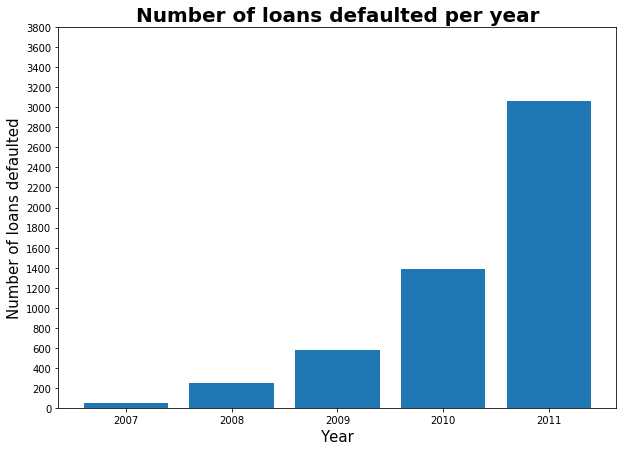

In [12]:
#Number of loans defaulted per year
defaults = loan.loc[loan['loan_status'] == 'Charged Off']
default_trend = pd.DataFrame(defaults.groupby(defaults.issue_d.dt.year)['id'].count())
default_trend = default_trend.reset_index()
default_trend.rename(columns = {'id':'number_of_loans'}, inplace = True)

#Building graph showing number of loans defaulted per year
#Setting the size of the graph
plt.figure(figsize=(10,7))

#Setting variable for y axis of the graph
y_tick = range(0,4000,200)

#Plotting the bar graph with title
plt.bar(default_trend['issue_d'], default_trend['number_of_loans'])
plt.title('Number of loans defaulted per year', fontsize=20, fontweight='bold')

#Setting the parameters for x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of loans defaulted', fontsize=15)
plt.yticks(y_tick, fontsize=10)
plt.xticks(default_trend['issue_d'], fontsize=10)

#Printing the graph
plt.show()

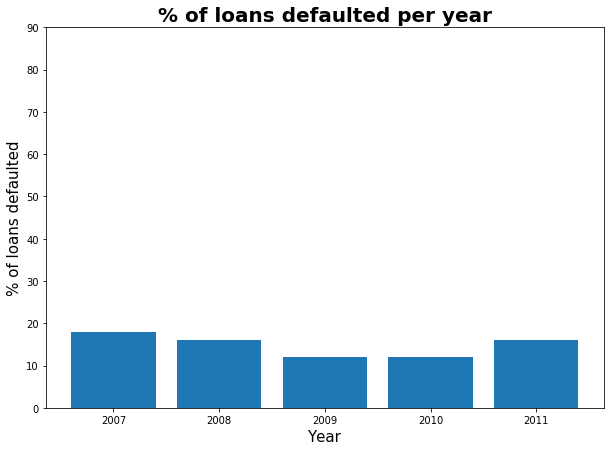

In [13]:
#Finding out % of default loans each year
default_trend['total_loans'] = pd.Series(loan_trend['number_of_loans'])
default_trend['default_loans_in%'] = round(100*(default_trend['number_of_loans']/default_trend['total_loans']))

#Building graph showing % of loans defaulted per year
#Setting the size of the graph
plt.figure(figsize=(10,7))

#Setting variable for y axis of the graph
y_tick = range(0,100,10)

#Plotting the bar graph with title
plt.bar(default_trend['issue_d'], default_trend['default_loans_in%'])
plt.title('% of loans defaulted per year', fontsize=20, fontweight='bold')

#Setting the parameters for x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('% of loans defaulted', fontsize=15)
plt.yticks(y_tick, fontsize=10)
plt.xticks(default_trend['issue_d'], fontsize=10)

#Printing the graph
plt.show()

In [14]:
#Deriving new columns for loan amount to salary % and interest to monthly salary %
loan['loan_to_sal%'] = round((loan['funded_amnt']/loan['annual_inc'])*100, 2)
loan['inst_to_mthly_sal%'] = round((loan['installment']/(loan['annual_inc']/12))*100, 2)

#Dividing the loan data into different annual salary groups to analyse the effect of loan amount versus annual and monthly salary
sal_below_30K = loan.loc[loan['annual_inc'] <= 30000]
sal_30K_to_40K = loan.loc[(loan['annual_inc'] > 30000) & (loan['annual_inc'] <= 40000)]
sal_40K_to_50K = loan.loc[(loan['annual_inc'] > 40000) & (loan['annual_inc'] <= 50000)]
sal_50K_to_60K = loan.loc[(loan['annual_inc'] > 50000) & (loan['annual_inc'] <= 60000)]
sal_60K_to_70K = loan.loc[(loan['annual_inc'] > 60000) & (loan['annual_inc'] <= 70000)]
sal_70K_to_80K = loan.loc[(loan['annual_inc'] > 70000) & (loan['annual_inc'] <= 80000)]
sal_80K_to_90K = loan.loc[(loan['annual_inc'] > 80000) & (loan['annual_inc'] <= 90000)]
sal_90K_to_100K = loan.loc[(loan['annual_inc'] > 90000) & (loan['annual_inc'] <= 100000)]
sal_100K_to_500K = loan.loc[(loan['annual_inc'] > 100000) & (loan['annual_inc'] <= 500000)]
sal_above_500K = loan.loc[loan['annual_inc'] > 500000]

In [15]:
sal_below_30K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,26.625755,9.665673,6303.125000
Fully Paid,23.475478,8.778750,5583.772315


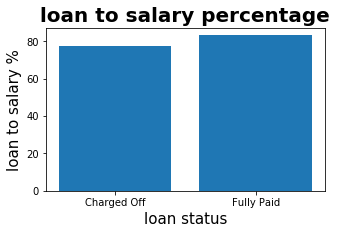

In [16]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=20, fontweight='bold')

plt.bar(sal_below_30K['loan_status'],sal_below_30K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [17]:
sal_30K_to_40K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,24.593494,8.484188,8877.617647
Fully Paid,21.600763,7.941311,7796.887992


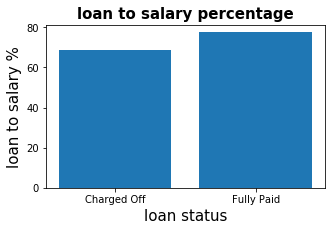

In [18]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_30K_to_40K['loan_status'],sal_30K_to_40K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [19]:
sal_40K_to_50K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,22.391899,7.621702,10263.655980
Fully Paid,19.767233,7.152300,9058.361648


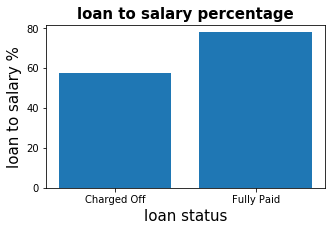

In [20]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_40K_to_50K['loan_status'],sal_40K_to_50K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [21]:
sal_50K_to_60K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,21.739490,7.368897,12170.403321
Fully Paid,18.097283,6.538894,10111.337020


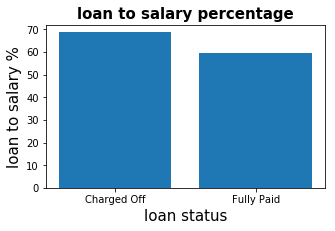

In [22]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_50K_to_60K['loan_status'],sal_50K_to_60K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [23]:
sal_60K_to_70K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,20.122551,6.784507,13236.871508
Fully Paid,16.920520,6.092367,11122.371445


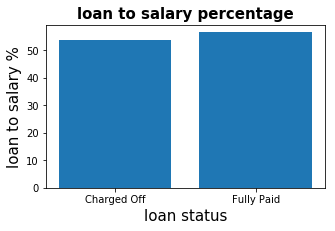

In [24]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_60K_to_70K['loan_status'],sal_60K_to_70K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [25]:
sal_70K_to_80K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,19.551715,6.678641,14816.314031
Fully Paid,16.211850,5.845660,12257.869911


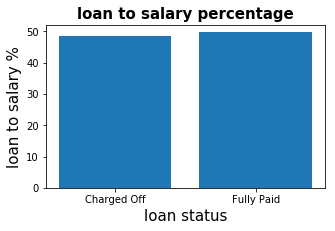

In [26]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_70K_to_80K['loan_status'],sal_70K_to_80K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [27]:
sal_80K_to_90K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,19.232458,6.528956,16490.909091
Fully Paid,15.092502,5.409004,12927.020202


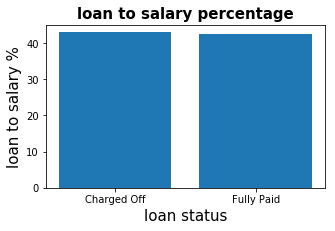

In [28]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_80K_to_90K['loan_status'],sal_80K_to_90K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [29]:
sal_90K_to_100K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,16.866376,5.751697,16218.463303
Fully Paid,13.899728,4.978426,13367.214043


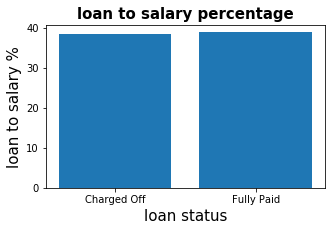

In [30]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_90K_to_100K['loan_status'],sal_90K_to_100K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [31]:
sal_100K_to_500K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,13.490364,4.654523,18059.618718
Fully Paid,11.452455,4.130196,15606.048893


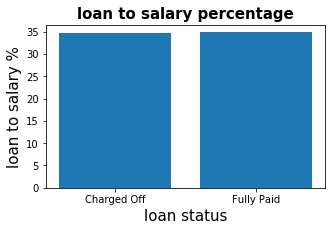

In [32]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_100K_to_500K['loan_status'],sal_100K_to_500K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [33]:
sal_above_500K.groupby(['loan_status'])['loan_to_sal%', 'inst_to_mthly_sal%', 'funded_amnt'].mean()

,loan_to_sal%,inst_to_mthly_sal%,funded_amnt
loan_status,,,
Charged Off,2.637273,0.967273,17161.363636
Fully Paid,1.829074,0.660185,13687.962963


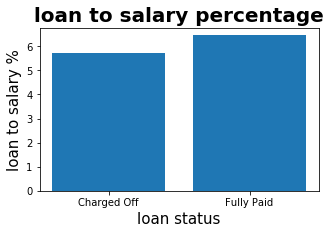

In [34]:
plt.figure(figsize=(5,3))
plt.title('loan to salary percentage', fontsize=15, fontweight='bold')

plt.bar(sal_above_500K['loan_status'],sal_above_500K['loan_to_sal%'])

plt.xlabel('loan status', fontsize=15)
plt.ylabel('loan to salary %', fontsize=15)

plt.show()

In [35]:
#Deriving new column to show if the loan id was penalised for late fee
loan['if_late_fee'] = loan['total_rec_late_fee']
loan.loc[loan.if_late_fee > 0, 'if_late_fee'] = 1

#Analysing if late fee is an indicator towards loan defaults
loan.groupby('loan_status')['if_late_fee'].agg(['sum', 'count'])

,sum,count
loan_status,,
Charged Off,838.0,5321
Fully Paid,1104.0,32112


In [36]:
#Analysing if number months as term has any effect on number of defaults
loan.groupby(['term_in_months', 'loan_status'])['id'].count()

term_in_months  loan_status
36              Charged Off     3013
                Fully Paid     25181
60              Charged Off     2308
                Fully Paid      6931
Name: id, dtype: int64

In [37]:
#Analysing the loan status with the grades on the defaults
loan.groupby(['loan_status','grade'])['id'].count()

loan_status  grade
Charged Off  A          552
             B         1342
             C         1263
             D         1069
             E          689
             F          310
             G           96
Fully Paid   A         9101
             B        10003
             C         6372
             D         3881
             E         1913
             F          644
             G          198
Name: id, dtype: int64

In [38]:
loan.groupby(['loan_status','grade','sub_grade'])['id'].count()

loan_status  grade  sub_grade
Charged Off  A      A1             24
                    A2             67
                    A3             89
                    A4            168
                    A5            204
             B      B1            152
                    B2            210
                    B3            324
                    B4            312
                    B5            344
             C      C1            317
                    C2            299
                    C3            253
                    C4            199
                    C5            195
             D      D1            159
                    D2            257
                    D3            246
                    D4            205
                    D5            202
             E      E1            193
                    E2            155
                    E3            113
                    E4            123
                    E5            105
             F      